In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("dataset/IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
df = df.drop_duplicates().reset_index(drop=True)

C:\Users\samet\AppData\Local\Temp\ipykernel_28764\2033337383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"],palette="coolwarm")


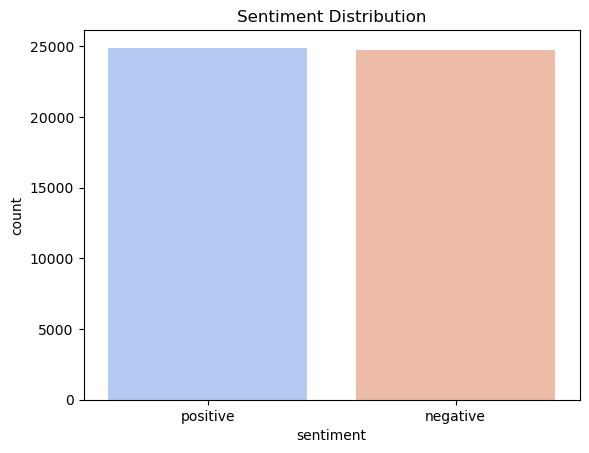

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df["sentiment"],palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re



stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text) #removing html tag
    text = re.sub(r"[^a-zA-Z]", " ", text) #removing speical char
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


In [8]:
df["clean_review"] = df["review"].apply(preprocess_text)

In [9]:
df

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
...,...,...,...
49577,I thought this movie did a down right good job...,positive,thought movie right good job creative original...
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49579,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49580,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...


In [10]:
df.drop("review",axis=1)

,sentiment,clean_review
0,positive,one reviewer mentioned watching oz episode hoo...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake think zombie ...
4,positive,petter mattei love time money visually stunnin...
...,...,...
49577,positive,thought movie right good job creative original...
49578,negative,bad plot bad dialogue bad acting idiotic direc...
49579,negative,catholic taught parochial elementary school nu...
49580,negative,going disagree previous comment side maltin on...


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])

y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_pred = model.predict(X_test)

print("Accuracy.", accuracy_score(y_test, y_pred))
print("\nClassification Report : \n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,y_pred))

Accuracy. 0.8867601089039024

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4939
           1       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917


Confusion Matrix :
 [[4304  635]
 [ 488 4490]]


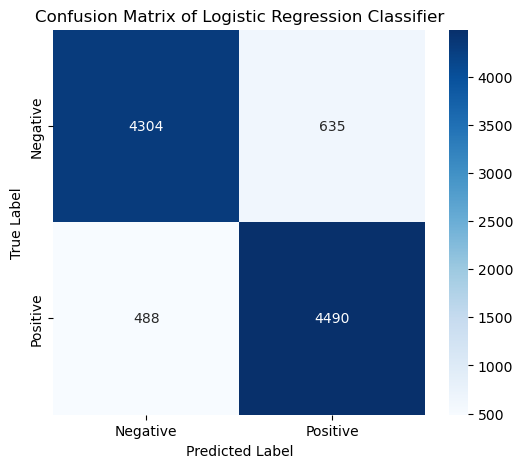

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()


In [ ]:
import numpy as np

feature_names = np.array(vectorizer.get_feature_names_out())
coefficients = model.coef_[0]

top_pos_idx = np.argsort(coefficients)[-10:]
top_pos_words = feature_names[top_pos_idx]
top_pos_weights = coefficients[top_pos_idx]

top_neg_idx = np.argsort(coefficients)[:10]
top_neg_words = feature_names[top_neg_idx]
top_neg_weights = coefficients[top_neg_idx]

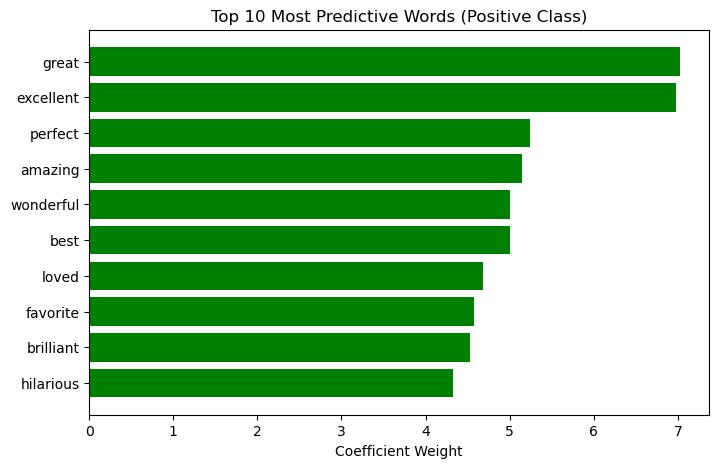

In [17]:
plt.figure(figsize=(8,5))
plt.barh(top_pos_words, top_pos_weights, color='green')
plt.title("Top 10 Most Predictive Words (Positive Class)")
plt.xlabel("Coefficient Weight")
plt.show()

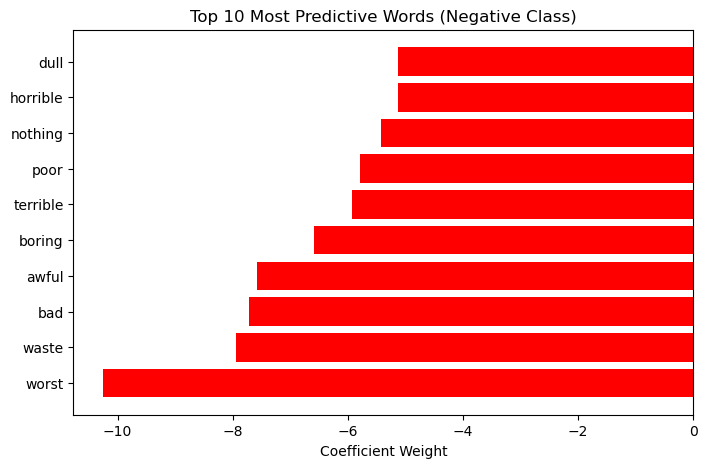

In [18]:
plt.figure(figsize=(8,5))
plt.barh(top_neg_words, top_neg_weights, color='red')
plt.title("Top 10 Most Predictive Words (Negative Class)")
plt.xlabel("Coefficient Weight")
plt.show()

In [ ]:

wrong_indices = []
wrong_predictions_list = []

for i in range(len(y_test)):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    if actual != predicted:
        wrong_indices.append(y_test.index[i])
        wrong_predictions_list.append((i, actual, predicted))

print("MISCLASSIFIED EXAMPLES:")
print("=" * 80)

for j in range(min(2, len(wrong_predictions_list))):
    i, actual, predicted = wrong_predictions_list[j]
    idx = wrong_indices[j]
    
    print(f"\nExample {j+1}:")
    print(f"Original Review: {df.loc[idx, 'review'][:150]}...")
    print(f"Actual Sentiment: {'Positive' if actual == 1 else 'Negative'}")
    print(f"Predicted Sentiment: {'Positive' if predicted == 1 else 'Negative'}")
    print(f"\nPossible reasons for misclassification:")
    
    review_text = df.loc[idx, 'review'].lower()
    
    if 'but' in review_text or 'however' in review_text:
        print("- Review contains 'but' or 'however', model may struggle with complex sentences")
    
    if 'not' in review_text and ('good' in review_text or 'bad' in review_text):
        print("- Contains negation like 'not good' or 'not bad', model may misinterpret this")

MISCLASSIFIED EXAMPLES:

Example 1:
Original Review: "National Treasure" (2004) is a thoroughly misguided hodge-podge of plot entanglements that borrow from nearly every cloak and dagger government consp...
Actual Sentiment: Negative
Predicted Sentiment: Positive

Possible reasons for misclassification:
- Review contains 'but' or 'however', model may struggle with complex sentences
- Contains negation like 'not good' or 'not bad', model may misinterpret this

Example 2:
Original Review: His significant charisma and commanding presence are about all that keep this afloat, but Fred Williamson has done far better urban action films inclu...
Actual Sentiment: Negative
Predicted Sentiment: Positive

Possible reasons for misclassification:
- Review contains 'but' or 'however', model may struggle with complex sentences


In [28]:
def predict_sentiment(review_text):
    cleaned = preprocess_text(review_text)
    
    vectorized = vectorizer.transform([cleaned])
    
    prediction = model.predict(vectorized)[0]
    probability = model.predict_proba(vectorized)[0]
    
    sentiment = "Positive 😊" if prediction == 1 else "Negative 😞"
    confidence = max(probability) * 100
    
    print(f"Review: {review_text}")
    print(f"Prediction: {sentiment}")
    print(f"Confidence: %{confidence:.2f}")
    
    return prediction

In [27]:
reviews = [
    "Absolutely loved this movie! The story was captivating and the actors did an amazing job.",
    "Fantastic film! Beautiful visuals, great soundtrack, and I was completely immersed from start to finish.",
    "I hated this movie. The plot was confusing and the acting was awful. Total waste of time.",
    "Terrible film. Boring, predictable, and the characters made no sense. Very disappointed.",
    "The movie had some beautiful scenes and good acting, but the plot was too slow and the ending was unsatisfying."
]

for review in reviews:
    print(predict_sentiment(review))

Review: Absolutely loved this movie! The story was captivating and the actors did an amazing job.
Prediction: Positive 😊
Confidence: %98.83
1
Review: Fantastic film! Beautiful visuals, great soundtrack, and I was completely immersed from start to finish.
Prediction: Positive 😊
Confidence: %97.94
1
Review: I hated this movie. The plot was confusing and the acting was awful. Total waste of time.
Prediction: Negative 😞
Confidence: %99.98
0
Review: Terrible film. Boring, predictable, and the characters made no sense. Very disappointed.
Prediction: Negative 😞
Confidence: %99.97
0
Review: The movie had some beautiful scenes and good acting, but the plot was too slow and the ending was unsatisfying.
Prediction: Positive 😊
Confidence: %51.92
1
